In [ ]:
import pandas as pd

In [ ]:
head = ['sentence']

df = pd.read_table('/content/content.txt', names=head)
df.head()

,sentence
0,사람이 다가오고 있습니다
1,사람과 자전거가 다가오고 있습니다
2,자전거와 사람이 다가오고 있습니다
3,사람과 자전거가 있습니다
4,자전거와 사람이 있습니다


In [ ]:
head = ['sentence']

df2 = pd.read_table('/content/captions.txt', names=head)
df2.head()

,sentence
0,사람이 다가오고 있습니다
1,사람이 걸어가고 있습니다
2,볼라드가 설치되어 있습니다
3,자동차가 있습니다
4,자전거가 세워져 있습니다


In [ ]:
train = pd.concat([df, df2])
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 49
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  100 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [ ]:
train.to_csv('/content/captionTrain.csv', index=False, encoding='utf-8')

여기부터 시작하면 됨

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/captionTrain_multiple.csv')
train.head()

,sentence
0,사람이 다가오고 있습니다
1,사람이 있습니다
2,사람이 앞에 있습니다
3,자전거가 있습니다
4,자전거가 앞에 있습니다


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  141 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB


음절 단위

In [ ]:
vocab = set()
for i, row in train.iterrows(): # dataframe의 row별로 반복
    sentence = row['sentence']
    for token in sentence: #음절 단위 token 반복
        if token not in vocab:
            vocab.add(token) # token set에 없다면 추가
        else:
            continue
vocab.add('<EOS>') # 문장 마지막을  <EOS>로 끝낼거라 <End of Sequence> token 추가
print ('고유 문자수 {}개'.format(len(vocab)))

고유 문자수 63개


In [ ]:
vocab

{' ',
 '<EOS>',
 '가',
 '갑',
 '개',
 '거',
 '걸',
 '고',
 '과',
 '나',
 '놓',
 '늘',
 '니',
 '다',
 '대',
 '도',
 '동',
 '되',
 '두',
 '둘',
 '드',
 '들',
 '라',
 '람',
 '럿',
 '른',
 '를',
 '몇',
 '바',
 '보',
 '볼',
 '브',
 '사',
 '서',
 '설',
 '세',
 '수',
 '습',
 '앞',
 '어',
 '에',
 '여',
 '옆',
 '오',
 '와',
 '움',
 '워',
 '의',
 '이',
 '있',
 '자',
 '전',
 '정',
 '져',
 '줄',
 '지',
 '직',
 '차',
 '치',
 '킥',
 '타',
 '탄',
 '토'}

In [ ]:
char2idx = {u:i for i, u in enumerate(vocab, start=1)}
char2idx

{' ': 22,
 '<EOS>': 40,
 '가': 46,
 '갑': 18,
 '개': 31,
 '거': 17,
 '걸': 30,
 '고': 20,
 '과': 34,
 '나': 61,
 '놓': 38,
 '늘': 15,
 '니': 29,
 '다': 54,
 '대': 5,
 '도': 28,
 '동': 51,
 '되': 53,
 '두': 9,
 '둘': 13,
 '드': 62,
 '들': 47,
 '라': 52,
 '람': 37,
 '럿': 11,
 '른': 58,
 '를': 43,
 '몇': 3,
 '바': 6,
 '보': 48,
 '볼': 24,
 '브': 50,
 '사': 44,
 '서': 4,
 '설': 12,
 '세': 33,
 '수': 41,
 '습': 23,
 '앞': 59,
 '어': 55,
 '에': 1,
 '여': 16,
 '옆': 60,
 '오': 63,
 '와': 10,
 '움': 35,
 '워': 2,
 '의': 19,
 '이': 32,
 '있': 21,
 '자': 27,
 '전': 42,
 '정': 39,
 '져': 14,
 '줄': 26,
 '지': 8,
 '직': 57,
 '차': 56,
 '치': 36,
 '킥': 49,
 '타': 25,
 '탄': 45,
 '토': 7}

In [ ]:
import pickle

# save data
with open('char2idx3.pickle','wb') as fw:
    pickle.dump(char2idx, fw)

# load data
with open('char2idx3.pickle', 'rb') as fr:
    test = pickle.load(fr)

# show data
print(test)

{'에': 1, '워': 2, '몇': 3, '서': 4, '대': 5, '바': 6, '토': 7, '지': 8, '두': 9, '와': 10, '럿': 11, '설': 12, '둘': 13, '져': 14, '늘': 15, '여': 16, '거': 17, '갑': 18, '의': 19, '고': 20, '있': 21, ' ': 22, '습': 23, '볼': 24, '타': 25, '줄': 26, '자': 27, '도': 28, '니': 29, '걸': 30, '개': 31, '이': 32, '세': 33, '과': 34, '움': 35, '치': 36, '람': 37, '놓': 38, '정': 39, '<EOS>': 40, '수': 41, '전': 42, '를': 43, '사': 44, '탄': 45, '가': 46, '들': 47, '보': 48, '킥': 49, '브': 50, '동': 51, '라': 52, '되': 53, '다': 54, '어': 55, '차': 56, '직': 57, '른': 58, '앞': 59, '옆': 60, '나': 61, '드': 62, '오': 63}


음절 단위

In [ ]:
import numpy as np

sentence2vec_list = []
for i, row in train.iterrows():
    temp_arr = np.array([char2idx[c] for c in row['sentence']] + [char2idx['<EOS>']])
    sentence2vec_list.append(temp_arr)

In [ ]:
sentence2vec_list

[array([44, 37, 32, 22, 54, 46, 63, 20, 22, 21, 23, 29, 54, 40]),
 array([44, 37, 32, 22, 21, 23, 29, 54, 40]),
 array([44, 37, 32, 22, 59,  1, 22, 21, 23, 29, 54, 40]),
 array([27, 42, 17, 46, 22, 21, 23, 29, 54, 40]),
 array([27, 42, 17, 46, 22, 59,  1, 22, 21, 23, 29, 54, 40]),
 array([44, 37, 34, 22, 27, 42, 17, 46, 22, 21, 23, 29, 54, 40]),
 array([27, 42, 17, 10, 22, 44, 37, 32, 22, 21, 23, 29, 54, 40]),
 array([44, 37, 47, 32, 22, 21, 23, 29, 54, 40]),
 array([44, 37, 47, 34, 22, 27, 42, 17, 46, 22, 21, 23, 29, 54, 40]),
 array([44, 37, 32, 22, 30, 55, 46, 20, 22, 21, 23, 29, 54, 40]),
 array([42, 51, 49, 48, 62, 43, 22, 45, 22, 44, 37, 32, 22, 54, 46, 63, 20,
        22, 21, 23, 29, 54, 40]),
 array([42, 51, 49, 48, 62, 43, 22, 45, 22, 44, 37, 34, 22, 54, 58, 22, 44,
        37, 47, 32, 22, 21, 23, 29, 54, 40]),
 array([42, 51, 49, 48, 62, 46, 22, 21, 23, 29, 54, 40]),
 array([42, 51, 49, 48, 62, 46, 22, 59,  1, 22, 21, 23, 29, 54, 40]),
 array([42, 51, 49, 48, 62, 46, 22,  3, 

In [ ]:
# vector 복원
for num in sentence2vec_list[0]:
  for c, id in char2idx.items():
    if id == num:
      print(c, end='')

사람이 다가오고 있습니다<EOS>

In [ ]:
import numpy as np

sentence2vec = np.array(sentence2vec_list, dtype=object)

sequence_list = []
for vec in sentence2vec:
    for i in range(len(vec)):
        sequence = vec[:i+1]
        sequence_list.append(sequence)

In [ ]:
sequence_list[:15]

[array([44]),
 array([44, 37]),
 array([44, 37, 32]),
 array([44, 37, 32, 22]),
 array([44, 37, 32, 22, 54]),
 array([44, 37, 32, 22, 54, 46]),
 array([44, 37, 32, 22, 54, 46, 63]),
 array([44, 37, 32, 22, 54, 46, 63, 20]),
 array([44, 37, 32, 22, 54, 46, 63, 20, 22]),
 array([44, 37, 32, 22, 54, 46, 63, 20, 22, 21]),
 array([44, 37, 32, 22, 54, 46, 63, 20, 22, 21, 23]),
 array([44, 37, 32, 22, 54, 46, 63, 20, 22, 21, 23, 29]),
 array([44, 37, 32, 22, 54, 46, 63, 20, 22, 21, 23, 29, 54]),
 array([44, 37, 32, 22, 54, 46, 63, 20, 22, 21, 23, 29, 54, 40]),
 array([44])]

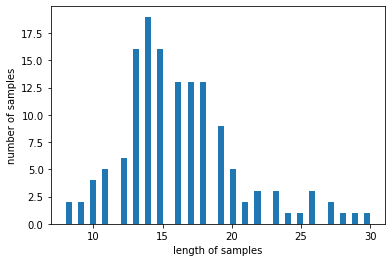

In [ ]:
import matplotlib.pyplot as plt

plt.hist([len(s) for s in sentence2vec_list], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = max(map(len, sentence2vec_list))
sequences = pad_sequences(sequence_list, maxlen=max_len, padding='pre')

In [ ]:
max_len

30

In [ ]:
sequences[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 44], dtype=int32)

In [ ]:
np.random.shuffle(sequences)
split_num = int(len(sequences) * 0.8)

X = sequences[:split_num,:-1]
y = sequences[:split_num,-1]

X_test = sequences[split_num:,:-1]
y_test = sequences[split_num:,-1]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, GRU

model = Sequential()
model.add(Embedding(5000, 300, input_length=max_len-1, mask_zero=True)) 
# 레이블을 분리하였으므로 이제 X의 길이는 max_len-1
model.add(GRU(128))
model.add(Dense(5000, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# sparse_categorical_crossentropy
# categorical_crossentropy와 다른점은 정답 integer값을 원-핫벡터로 만들어주지 않아도 된다는점

model.summary()

hist = model.fit(X, y, validation_split=0.1, shuffle=True, epochs=70, batch_size=32, verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 29, 300)           1500000   
                                                                 
 gru_5 (GRU)                 (None, 128)               165120    
                                                                 
 dense_5 (Dense)             (None, 5000)              645000    
                                                                 
Total params: 2,310,120
Trainable params: 2,310,120
Non-trainable params: 0
_________________________________________________________________
Epoch 1/70
52/52 [==============================] - 15s 127ms/step - loss: 6.1227 - accuracy: 0.2241 - val_loss: 3.8530 - val_accuracy: 0.1467
Epoch 2/70
52/52 [==============================] - 5s 91ms/step - loss: 3.6388 - accuracy: 0.1847 - val_loss: 3.5985 - val_accuracy: 0.2011
Epoch 3/70
52/52 [======

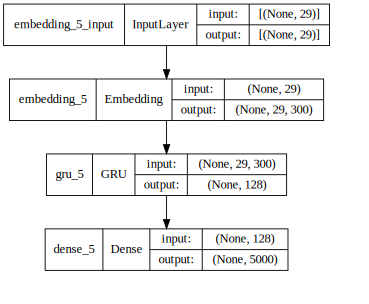

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

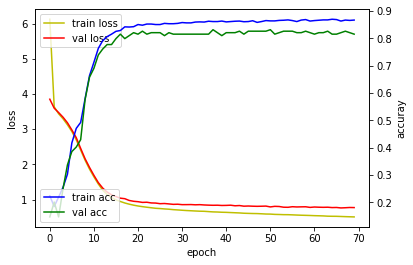

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()


In [ ]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

print('')
print('loss : ' + str(loss_and_metrics[0]))
print('accuray : ' + str(loss_and_metrics[1]))

15/15 [==============================] - 0s 20ms/step - loss: 0.8933 - accuracy: 0.7996

loss : 0.893280565738678
accuray : 0.7995642423629761


In [ ]:
n = 35
max_len = 30


current_word = '차'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'차가 있습니다'

In [ ]:
n = 35


current_word = '사람'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'사람이 앞에 있습니다'

In [ ]:
n = 35


current_word = '자전거'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'자전거가 앞에 있습니다'

In [ ]:
n = 35


current_word = '전동킥보드'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'전동킥보드를 탄 사람이 있습니다'

In [ ]:
n = 35


current_word = '볼라드'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'볼라드가 앞에 있습니다'

In [ ]:
n = 35


current_word = '오토바이'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'오토바이가 앞에 있습니다'

모델 저장

In [ ]:
from keras.models import load_model
model.save('senten_generating_model3.h5')

모델 불러와 사용해보기

In [2]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax

from keras.models import load_model
model = load_model('/content/senten_generating_model3.h5')

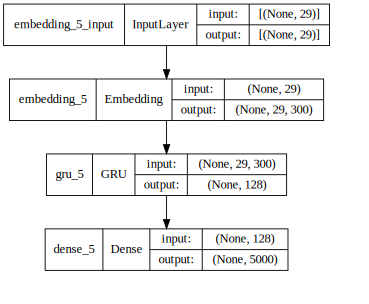

In [3]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=65).create(prog='dot', format='svg'))

In [5]:
import pickle

# load data
with open('/content/char2idx3.pickle', 'rb') as fr:
    char2idx = pickle.load(fr)

# show data
print(char2idx)

{'에': 1, '워': 2, '몇': 3, '서': 4, '대': 5, '바': 6, '토': 7, '지': 8, '두': 9, '와': 10, '럿': 11, '설': 12, '둘': 13, '져': 14, '늘': 15, '여': 16, '거': 17, '갑': 18, '의': 19, '고': 20, '있': 21, ' ': 22, '습': 23, '볼': 24, '타': 25, '줄': 26, '자': 27, '도': 28, '니': 29, '걸': 30, '개': 31, '이': 32, '세': 33, '과': 34, '움': 35, '치': 36, '람': 37, '놓': 38, '정': 39, '<EOS>': 40, '수': 41, '전': 42, '를': 43, '사': 44, '탄': 45, '가': 46, '들': 47, '보': 48, '킥': 49, '브': 50, '동': 51, '라': 52, '되': 53, '다': 54, '어': 55, '차': 56, '직': 57, '른': 58, '앞': 59, '옆': 60, '나': 61, '드': 62, '오': 63}


In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

n = 35
max_len = 30

current_word = '사람'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'사람이 앞에 있습니다'

In [9]:
n = 35
max_len = 30

current_word = '차'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'차가 있습니다'

In [10]:
n = 35
max_len = 30

current_word = '자전거'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'자전거가 앞에 있습니다'

In [11]:
n = 35
max_len = 30

current_word = '오토바이'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'오토바이가 앞에 있습니다'

In [12]:
n = 35
max_len = 30

current_word = '전동킥보드'
init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
sentence = ''

for _ in range(n): # n번 반복
    encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
    # 현재 단어에 대한 정수 인코딩
    
    encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
    # 데이터에 대한 패딩
    
    result = np.argmax(model.predict(encoded), axis=-1) 
	
    # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
    for word, index in char2idx.items(): 
        if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
            break # 해당 단어가 예측 단어이므로 break
    current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
    sentence = sentence + word # 예측 단어를 문장에 저장
    if word == '<EOS>':
        break;
# for문이므로 이 행동을 다시 반복
sentence = init_word + sentence
sentence.replace('<EOS>',"")

'전동킥보드를 탄 사람이 있습니다'

In [13]:
n = 35
max_len = 30
total = []

key = ['사람', '차']
klen = len(key)
print(klen)

for k in key:
  current_word = k
  init_word = current_word # 처음 들어온 단어도 마지막에 같이 출력하기위해 저장
  sentence = ''
  for _ in range(n): # n번 반복
      encoded = [char2idx[token] for token in current_word]#t.texts_to_sequences([current_word])[0] 
      # 현재 단어에 대한 정수 인코딩
      
      encoded = pad_sequences([encoded], maxlen=max_len-1, padding='pre') 
      # 데이터에 대한 패딩
      
      result = np.argmax(model.predict(encoded), axis=-1) 
    
      # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
      for word, index in char2idx.items(): 
          if index == result: # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면
              break # 해당 단어가 예측 단어이므로 break
      current_word = current_word + word # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
      sentence = sentence + word # 예측 단어를 문장에 저장
      if word == '<EOS>':
          break;
  # for문이므로 이 행동을 다시 반복
  sentence = init_word + sentence
  if klen > 1:
    sentence = sentence.replace('습니다<EOS>',"고 ")
    klen -= 1
  else:
    sentence = sentence.replace('<EOS>',"")
  print(sentence)
  total.append(sentence)

print(''.join(total))

2
사람이 앞에 있고 
차가 있습니다
사람이 앞에 있고 차가 있습니다


In [23]:
!python3 /content/gru_generator.py

2022-01-28 07:28:57.086069: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2
전동킥보드를 탄 사람이 있고 다수의 오토바이가 있습니다
